# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Aniket\AppliedAI\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv', encoding = "ISO-8859-1")
resource_data = pd.read_csv('resources.csv', encoding = "ISO-8859-1")

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## Merging train_data.csv and resource.csv

In [5]:
# merge two csv into one on 'id' and with 'left join'
re_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
data = project_data.merge(re_data, on='id', how='left')

In [6]:
print("Number of data points in data", data.shape)
print(data.columns.values)
data.head(2)

Number of data points in data (109248, 19)
['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity  
0        23  
1         1

## 1.2 Preprocessing of `project_subject_categories`

In [7]:
# categories
catogories = list(data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [8]:
data['clean_categories'] = cat_list
data.drop(['project_subject_categories'], axis=1, inplace=True)

## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
# sub_catogories
sub_catogories = list(data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [10]:
data['clean_subcategories'] = sub_cat_list
data.drop(['project_subject_subcategories'], axis=1, inplace=True)

## 1.3 preprocessing of `project_grade_category`

In [11]:
# project_grade
grades = list(data['project_grade_category'].values)

grade_list = []
for i in grades:
    temp = ""
    
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'Grades' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('Grades ','grades_') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" "
        temp = temp.replace('-','_') #" abc ".strip() will return "abc", remove the trailing spaces
    grade_list.append(temp.strip())

In [12]:
data['clean_grades'] = grade_list
data.drop(['project_grade_category'], axis=1, inplace=True)

## 1.3 Text preprocessing

## 1.3.1 Preprocessing of project_essay

In [13]:
# merge two column text dataframe: 
data["essay"] = data["project_essay_1"].map(str) +\
                        data["project_essay_2"].map(str) + \
                        data["project_essay_3"].map(str) + \
                        data["project_essay_4"].map(str)

In [14]:
data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

    clean_grades                                              essay  
0  grades_PreK_2  My students are English learners that are work...  
1     grades_6_8  Our students arrive to our school eager to lea...

In [15]:
# printing some random reviews
print(data['essay'].values[0])
print("="*50)
print(data['essay'].values[150])
print("="*50)
print(data['essay'].values[1000])
print("="*50)
print(data['essay'].values[20000])
print("="*50)
print(data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [16]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
sent = decontracted(data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [18]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [19]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [20]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [21]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:23<00:00, 759.06it/s]


In [22]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [23]:
data['preprocessed_essays'] = preprocessed_essays
data.drop(['essay'], axis=1, inplace=True)

## 1.3.2 Preprocessing of project_title

In [24]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 16183.07it/s]


In [25]:
data['preprocessed_project_title'] = preprocessed_project_title
data.drop(['project_title'], axis=1, inplace=True)

In [26]:
data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             0                    0  154.60   
1                                             7                    1  299.00   
2                                             1                    0  516.85   
3                                             4                    1  232.90   
4                                             1                    1   67.98   

   quantity                clean_categories           clean_subcategories  \
0        23               Literacy_Language                  ESL Literacy   
1         1    History_Civics Health_Sports  Civics_Government TeamSports   
2        22                   Health_Sports    Health_Wellness TeamSports   
3         4  Literacy_Language Math_Science          Literacy Mathematics   
4         4                    Math_Science                   Mathematics   

    clean_grades                                preprocessed_essays  \
0  grades_PreK_2  my students english learners working english s...   
1     grades_6_8  our students arrive school eager learn they po...   
2     grades_6_8  true champions not always ones win guts by mia...   
3  grades_PreK_2  i work unique school filled esl english second...   
4  grades_PreK_2  our second grade classroom next year made arou...   

                        preprocessed_project_title  
0        educational support english learners home  
1                 wanted projector hungry learners  
2  soccer equipment awesome middle school students  
3                           techie kindergarteners  
4                           interactive math tools

## 1.5 Preparing data for models

In [27]:
X = data

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [28]:
# train, cv and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['project_is_approved'].values, test_size=0.33, stratify=data['project_is_approved'].values)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data using Response coding

#### Categories

In [29]:
cat_class_1 = X_train['clean_categories'].loc[X_train['project_is_approved'] == 1]

clean_category_pos = {}

for i in cat_class_1 :
    for j in i.split():
        if j not in clean_category_pos :
            clean_category_pos[j] = 1
        else :
            clean_category_pos[j] += 1

In [30]:
clean_category_pos

{'Literacy_Language': 20345,
 'Math_Science': 15678,
 'Music_Arts': 3790,
 'AppliedLearning': 4500,
 'SpecialNeeds': 5081,
 'Health_Sports': 5470,
 'History_Civics': 2282,
 'Warmth': 541,
 'Care_Hunger': 541}

In [31]:
cat_class_0 = X_train['clean_categories'].loc[X_train['project_is_approved'] == 0]

clean_category_neg = {}

for i in cat_class_0:
    for j in i.split():
        if j not in clean_category_neg :
            clean_category_neg[j] = 1
        else :
            clean_category_neg[j] += 1

In [32]:
clean_category_neg

{'Literacy_Language': 3178,
 'SpecialNeeds': 1075,
 'Health_Sports': 956,
 'Math_Science': 2943,
 'AppliedLearning': 907,
 'Music_Arts': 689,
 'History_Civics': 382,
 'Warmth': 54,
 'Care_Hunger': 54}

In [33]:
clean_category_total = {}

cat_class = X_train['clean_categories']

for i in cat_class:
    for j in i.split():
        if j not in clean_category_total :
            clean_category_total[j] = 1
        else :
            clean_category_total[j] += 1

In [34]:
clean_category_total

{'Literacy_Language': 23523,
 'Math_Science': 18621,
 'Music_Arts': 4479,
 'AppliedLearning': 5407,
 'SpecialNeeds': 6156,
 'Health_Sports': 6426,
 'History_Civics': 2664,
 'Warmth': 595,
 'Care_Hunger': 595}

In [35]:
cat_pos_e = {}

for i in clean_category_total.keys():
    cat_pos_e[i] = clean_category_pos[i]/clean_category_total[i]

In [36]:
cat_pos_e

{'Literacy_Language': 0.8648981847553459,
 'Math_Science': 0.8419526341227647,
 'Music_Arts': 0.8461710203170351,
 'AppliedLearning': 0.8322544849269465,
 'SpecialNeeds': 0.8253736192332684,
 'Health_Sports': 0.8512293806411454,
 'History_Civics': 0.8566066066066066,
 'Warmth': 0.9092436974789916,
 'Care_Hunger': 0.9092436974789916}

In [37]:
cat_neg_e = {}

for i in clean_category_total.keys():
    cat_neg_e[i] = clean_category_neg[i]/clean_category_total[i]

In [38]:
cat_neg_e

{'Literacy_Language': 0.13510181524465417,
 'Math_Science': 0.1580473658772354,
 'Music_Arts': 0.15382897968296494,
 'AppliedLearning': 0.16774551507305344,
 'SpecialNeeds': 0.17462638076673165,
 'Health_Sports': 0.14877061935885466,
 'History_Civics': 0.14339339339339338,
 'Warmth': 0.0907563025210084,
 'Care_Hunger': 0.0907563025210084}

In [39]:
class_0 = []
class_1 = []

for i in X_train['clean_categories']:
    j = i.split()
    if len(j)==1:
        class_1.append(cat_pos_e[i])
        class_0.append(cat_neg_e[i])
    else:
        p = cat_pos_e[j[0]]
        q = cat_pos_e[j[1]]
        r = cat_neg_e[j[0]]
        s = cat_neg_e[j[1]]
        
        class_1.append(p*q)
        class_0.append(r*s)
        

In [40]:
X_train['cat_class_1'] = class_1
X_train['cat_class_0'] = class_0

In [41]:
class_0 = []
class_1 = []

for i in X_cv['clean_categories']:
    j = i.split()
    if len(j)==1:
        class_1.append(cat_pos_e[i])
        class_0.append(cat_neg_e[i])
    else:
        p = cat_pos_e[j[0]]
        q = cat_pos_e[j[1]]
        r = cat_neg_e[j[0]]
        s = cat_neg_e[j[1]]
        
        class_1.append(p*q)
        class_0.append(r*s)
        
        
X_cv['cat_class_1'] = class_1
X_cv['cat_class_0'] = class_0

In [42]:
class_0 = []
class_1 = []

for i in X_test['clean_categories']:
    j = i.split()
    if len(j)==1:
        class_1.append(cat_pos_e[i])
        class_0.append(cat_neg_e[i])
    else:
        p = cat_pos_e[j[0]]
        q = cat_pos_e[j[1]]
        r = cat_neg_e[j[0]]
        s = cat_neg_e[j[1]]
        
        class_1.append(p*q)
        class_0.append(r*s)
        
        
X_test['cat_class_1'] = class_1
X_test['cat_class_0'] = class_0

In [43]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['cat_class_1'].values.reshape(-1,1))

X_train_cat_class_1_norm = normalizer.transform(X_train['cat_class_1'].values.reshape(-1,1))
X_cv_cat_class_1_norm = normalizer.transform(X_cv['cat_class_1'].values.reshape(-1,1))
X_test_cat_class_1_norm = normalizer.transform(X_test['cat_class_1'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_cat_class_1_norm.shape, y_train.shape)
print(X_cv_cat_class_1_norm.shape, y_cv.shape)
print(X_test_cat_class_1_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [44]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['cat_class_0'].values.reshape(-1,1))

X_train_cat_class_0_norm = normalizer.transform(X_train['cat_class_0'].values.reshape(-1,1))
X_cv_cat_class_0_norm = normalizer.transform(X_cv['cat_class_0'].values.reshape(-1,1))
X_test_cat_class_0_norm = normalizer.transform(X_test['cat_class_0'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_cat_class_0_norm.shape, y_train.shape)
print(X_cv_cat_class_0_norm.shape, y_cv.shape)
print(X_test_cat_class_0_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Sub-categories

In [45]:
subcat_class_1 = X_train['clean_subcategories'].loc[X_train['project_is_approved'] == 1]

clean_subcategory_pos = {}

for i in subcat_class_1 :
    for j in i.split():
        if j not in clean_subcategory_pos :
            clean_subcategory_pos[j] = 1
        else :
            clean_subcategory_pos[j] += 1

In [46]:
clean_subcategory_pos

{'Literature_Writing': 8584,
 'Mathematics': 10755,
 'EnvironmentalScience': 2044,
 'Literacy': 13182,
 'VisualArts': 2285,
 'CharacterEducation': 755,
 'SpecialNeeds': 5081,
 'College_CareerPrep': 949,
 'EarlyDevelopment': 1583,
 'Health_LifeScience': 1564,
 'Gym_Fitness': 1749,
 'TeamSports': 773,
 'AppliedSciences': 4010,
 'ESL': 1665,
 'PerformingArts': 729,
 'Health_Wellness': 4022,
 'CommunityService': 156,
 'Other': 889,
 'Music': 1191,
 'Civics_Government': 326,
 'Warmth': 541,
 'Care_Hunger': 541,
 'SocialSciences': 742,
 'FinancialLiteracy': 222,
 'NutritionEducation': 490,
 'History_Geography': 1206,
 'ForeignLanguages': 337,
 'Extracurricular': 287,
 'ParentInvolvement': 270,
 'Economics': 102}

In [47]:
subcat_class_0 = X_train['clean_subcategories'].loc[X_train['project_is_approved'] == 0]

clean_subcategory_neg = {}

for i in subcat_class_0 :
    for j in i.split():
        if j not in clean_subcategory_neg :
            clean_subcategory_neg[j] = 1
        else :
            clean_subcategory_neg[j] += 1

In [48]:
clean_subcategory_neg

{'Literacy': 1963,
 'Literature_Writing': 1418,
 'SpecialNeeds': 1075,
 'Health_Wellness': 636,
 'Mathematics': 1900,
 'Extracurricular': 56,
 'VisualArts': 473,
 'AppliedSciences': 844,
 'Gym_Fitness': 300,
 'ForeignLanguages': 71,
 'Health_LifeScience': 320,
 'CharacterEducation': 177,
 'EarlyDevelopment': 328,
 'EnvironmentalScience': 462,
 'College_CareerPrep': 189,
 'NutritionEducation': 106,
 'History_Geography': 202,
 'SocialSciences': 112,
 'Music': 165,
 'Other': 170,
 'PerformingArts': 118,
 'ESL': 303,
 'CommunityService': 43,
 'Warmth': 54,
 'Care_Hunger': 54,
 'TeamSports': 179,
 'Civics_Government': 60,
 'ParentInvolvement': 38,
 'FinancialLiteracy': 48,
 'Economics': 26}

In [49]:
clean_subcategory_total = {}

subcat_class = X_train['clean_subcategories']

for i in subcat_class:
    for j in i.split():
        if j not in clean_subcategory_total :
            clean_subcategory_total[j] = 1
        else :
            clean_subcategory_total[j] += 1

In [50]:
clean_subcategory_total

{'Literature_Writing': 10002,
 'Mathematics': 12655,
 'EnvironmentalScience': 2506,
 'Literacy': 15145,
 'VisualArts': 2758,
 'CharacterEducation': 932,
 'SpecialNeeds': 6156,
 'College_CareerPrep': 1138,
 'EarlyDevelopment': 1911,
 'Health_LifeScience': 1884,
 'Gym_Fitness': 2049,
 'TeamSports': 952,
 'AppliedSciences': 4854,
 'Health_Wellness': 4658,
 'Extracurricular': 343,
 'ESL': 1968,
 'PerformingArts': 847,
 'CommunityService': 199,
 'Other': 1059,
 'Music': 1356,
 'ForeignLanguages': 408,
 'Civics_Government': 386,
 'NutritionEducation': 596,
 'History_Geography': 1408,
 'SocialSciences': 854,
 'Warmth': 595,
 'Care_Hunger': 595,
 'FinancialLiteracy': 270,
 'ParentInvolvement': 308,
 'Economics': 128}

In [51]:
subcat_pos_e = {}

for i in clean_subcategory_total.keys():
    subcat_pos_e[i] = clean_subcategory_pos[i]/clean_subcategory_total[i]

In [52]:
subcat_neg_e = {}

for i in clean_subcategory_total.keys():
    subcat_neg_e[i] = clean_subcategory_neg[i]/clean_subcategory_total[i]

In [53]:
class_0 = []
class_1 = []

for i in X_train['clean_subcategories']:
    j = i.split()
    if len(j)==1:
        class_1.append(subcat_pos_e[i])
        class_0.append(subcat_neg_e[i])
    else:
        p = subcat_pos_e[j[0]]
        q = subcat_pos_e[j[1]]
        r = subcat_neg_e[j[0]]
        s = subcat_neg_e[j[1]]
        
        class_1.append(p*q)
        class_0.append(r*s)
        
        
X_train['subcat_class_1'] = class_1
X_train['subcat_class_0'] = class_0

In [54]:
class_0 = []
class_1 = []

for i in X_cv['clean_subcategories']:
    j = i.split()
    if len(j)==1:
        class_1.append(subcat_pos_e[i])
        class_0.append(subcat_neg_e[i])
    else:
        p = subcat_pos_e[j[0]]
        q = subcat_pos_e[j[1]]
        r = subcat_neg_e[j[0]]
        s = subcat_neg_e[j[1]]
        
        class_1.append(p*q)
        class_0.append(r*s)
        
        
X_cv['subcat_class_1'] = class_1
X_cv['subcat_class_0'] = class_0

In [55]:
class_0 = []
class_1 = []

for i in X_test['clean_subcategories']:
    j = i.split()
    if len(j)==1:
        class_1.append(subcat_pos_e[i])
        class_0.append(subcat_neg_e[i])
    else:
        p = subcat_pos_e[j[0]]
        q = subcat_pos_e[j[1]]
        r = subcat_neg_e[j[0]]
        s = subcat_neg_e[j[1]]
        
        class_1.append(p*q)
        class_0.append(r*s)
        
        
X_test['subcat_class_1'] = class_1
X_test['subcat_class_0'] = class_0

In [56]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['subcat_class_1'].values.reshape(-1,1))

X_train_subcat_class_1_norm = normalizer.transform(X_train['subcat_class_1'].values.reshape(-1,1))
X_cv_subcat_class_1_norm = normalizer.transform(X_cv['subcat_class_1'].values.reshape(-1,1))
X_test_subcat_class_1_norm = normalizer.transform(X_test['subcat_class_1'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_subcat_class_1_norm.shape, y_train.shape)
print(X_cv_subcat_class_1_norm.shape, y_cv.shape)
print(X_test_subcat_class_1_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [57]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['subcat_class_0'].values.reshape(-1,1))

X_train_subcat_class_0_norm = normalizer.transform(X_train['subcat_class_0'].values.reshape(-1,1))
X_cv_subcat_class_0_norm = normalizer.transform(X_cv['subcat_class_0'].values.reshape(-1,1))
X_test_subcat_class_0_norm = normalizer.transform(X_test['subcat_class_0'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_subcat_class_0_norm.shape, y_train.shape)
print(X_cv_subcat_class_0_norm.shape, y_cv.shape)
print(X_test_subcat_class_0_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### School-State

In [58]:
school_state_class_1 = X_train['school_state'].loc[X_train['project_is_approved'] == 1]

school_state_pos = {}

for i in school_state_class_1 :
    for j in i.split():
        if j not in school_state_pos :
            school_state_pos[j] = 1
        else :
            school_state_pos[j] += 1

In [59]:
school_state_pos

{'NY': 2858,
 'CA': 5831,
 'TX': 2772,
 'LA': 831,
 'UT': 690,
 'AZ': 862,
 'SD': 125,
 'MO': 964,
 'MN': 470,
 'GA': 1455,
 'MD': 589,
 'CO': 425,
 'IA': 264,
 'KS': 252,
 'OR': 447,
 'MI': 1207,
 'AL': 674,
 'FL': 2341,
 'WA': 946,
 'IL': 1646,
 'NM': 220,
 'VA': 796,
 'NC': 1965,
 'OH': 974,
 'IN': 1018,
 'CT': 656,
 'PA': 1186,
 'NV': 493,
 'MA': 896,
 'WI': 688,
 'WY': 34,
 'NJ': 815,
 'SC': 1523,
 'OK': 876,
 'AR': 367,
 'ME': 189,
 'KY': 474,
 'HI': 200,
 'DC': 188,
 'WV': 213,
 'MS': 487,
 'TN': 656,
 'DE': 138,
 'ND': 61,
 'RI': 108,
 'AK': 110,
 'ID': 266,
 'NE': 118,
 'MT': 89,
 'NH': 135,
 'VT': 27}

In [60]:
school_state_class_0 = X_train['school_state'].loc[X_train['project_is_approved'] == 0]

school_state_neg = {}

for i in school_state_class_0 :
    for j in i.split():
        if j not in school_state_neg :
            school_state_neg[j] = 1
        else :
            school_state_neg[j] += 1

In [61]:
school_state_neg

{'PA': 212,
 'MS': 95,
 'NC': 339,
 'FL': 489,
 'TX': 618,
 'IL': 279,
 'NY': 467,
 'CO': 78,
 'MI': 221,
 'KY': 77,
 'AR': 87,
 'IN': 194,
 'UT': 138,
 'AL': 116,
 'WI': 122,
 'GA': 272,
 'CA': 959,
 'SC': 235,
 'KS': 43,
 'MO': 167,
 'LA': 172,
 'WA': 139,
 'TN': 114,
 'NV': 88,
 'ID': 49,
 'WY': 10,
 'VA': 132,
 'OH': 136,
 'OK': 165,
 'DE': 25,
 'AZ': 154,
 'NJ': 145,
 'MA': 150,
 'WV': 33,
 'MT': 22,
 'NM': 44,
 'MD': 111,
 'OR': 102,
 'HI': 33,
 'MN': 70,
 'CT': 89,
 'IA': 43,
 'SD': 23,
 'NH': 22,
 'DC': 42,
 'NE': 17,
 'RI': 18,
 'AK': 25,
 'ME': 29,
 'ND': 7,
 'VT': 9}

In [62]:
school_state_class = X_train['school_state']
school_state_total = {}

for i in school_state_class :
    for j in i.split():
        if j not in school_state_total :
            school_state_total[j] = 1
        else :
            school_state_total[j] += 1

In [63]:
school_state_total

{'NY': 3325,
 'CA': 6790,
 'TX': 3390,
 'LA': 1003,
 'UT': 828,
 'AZ': 1016,
 'PA': 1398,
 'SD': 148,
 'MS': 582,
 'MO': 1131,
 'MN': 540,
 'GA': 1727,
 'MD': 700,
 'CO': 503,
 'NC': 2304,
 'IA': 307,
 'FL': 2830,
 'KS': 295,
 'OR': 549,
 'IL': 1925,
 'MI': 1428,
 'AL': 790,
 'WA': 1085,
 'NM': 264,
 'VA': 928,
 'KY': 551,
 'OH': 1110,
 'IN': 1212,
 'AR': 454,
 'CT': 745,
 'NV': 581,
 'MA': 1046,
 'WI': 810,
 'WY': 44,
 'NJ': 960,
 'SC': 1758,
 'OK': 1041,
 'ME': 218,
 'HI': 233,
 'DC': 230,
 'TN': 770,
 'WV': 246,
 'DE': 163,
 'ND': 68,
 'ID': 315,
 'RI': 126,
 'AK': 135,
 'NE': 135,
 'MT': 111,
 'NH': 157,
 'VT': 36}

In [64]:
school_state_pos_e = {}

for i in school_state_total.keys():
    school_state_pos_e[i] = school_state_pos[i]/school_state_total[i]

In [65]:
school_state_neg_e = {}

for i in school_state_total.keys():
    school_state_neg_e[i] = school_state_neg[i]/school_state_total[i]

In [66]:
class_0 = []
class_1 = []

for i in X_train['school_state']:
    class_1.append(school_state_pos_e[i])
    class_0.append(school_state_neg_e[i])
        
        
X_train['school_state_class_1'] = class_1
X_train['school_state_class_0'] = class_0

In [67]:
class_0 = []
class_1 = []

for i in X_cv['school_state']:
    class_1.append(school_state_pos_e[i])
    class_0.append(school_state_neg_e[i])
        
        
X_cv['school_state_class_1'] = class_1
X_cv['school_state_class_0'] = class_0

In [68]:
class_0 = []
class_1 = []

for i in X_test['school_state']:
    class_1.append(school_state_pos_e[i])
    class_0.append(school_state_neg_e[i])
        
        
X_test['school_state_class_1'] = class_1
X_test['school_state_class_0'] = class_0

In [69]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['school_state_class_1'].values.reshape(-1,1))

X_train_school_state_class_1_norm = normalizer.transform(X_train['school_state_class_1'].values.reshape(-1,1))
X_cv_school_state_class_1_norm = normalizer.transform(X_cv['school_state_class_1'].values.reshape(-1,1))
X_test_school_state_class_1_norm = normalizer.transform(X_test['school_state_class_1'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_school_state_class_1_norm.shape, y_train.shape)
print(X_cv_school_state_class_1_norm.shape, y_cv.shape)
print(X_test_school_state_class_1_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [70]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['school_state_class_0'].values.reshape(-1,1))

X_train_school_state_class_0_norm = normalizer.transform(X_train['school_state_class_0'].values.reshape(-1,1))
X_cv_school_state_class_0_norm = normalizer.transform(X_cv['school_state_class_0'].values.reshape(-1,1))
X_test_school_state_class_0_norm = normalizer.transform(X_test['school_state_class_0'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_school_state_class_0_norm.shape, y_train.shape)
print(X_cv_school_state_class_0_norm.shape, y_cv.shape)
print(X_test_school_state_class_0_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Teacher Prefix

In [71]:
teacher_prefix_class_1 = X_train['teacher_prefix'].loc[X_train['project_is_approved'] == 1]

teacher_prefix_pos = {}

for i in teacher_prefix_class_1 :
    if i not in teacher_prefix_pos :
        teacher_prefix_pos[i] = 1
    else :
        teacher_prefix_pos[i] += 1

In [72]:
teacher_prefix_pos

{'Mrs.': 22090, 'Ms.': 14766, 'Mr.': 3956, 'Teacher': 798, nan: 2, 'Dr.': 3}

In [73]:
teacher_prefix_class_0 = X_train['teacher_prefix'].loc[X_train['project_is_approved'] == 0]

teacher_prefix_neg = {}

for i in teacher_prefix_class_0 :
    if i not in teacher_prefix_neg :
        teacher_prefix_neg[i] = 1
    else :
        teacher_prefix_neg[i] += 1

In [74]:
teacher_prefix_neg

{'Ms.': 2793, 'Mrs.': 3721, 'Teacher': 204, 'Mr.': 707, 'Dr.': 1}

In [75]:
teacher_prefix_class = X_train['teacher_prefix']

teacher_prefix_total = {}

for i in teacher_prefix_class :
    if i not in teacher_prefix_total :
        teacher_prefix_total[i] = 1
    else :
        teacher_prefix_total[i] += 1

In [76]:
teacher_prefix_total

{'Mrs.': 25811, 'Ms.': 17559, 'Mr.': 4663, 'Teacher': 1002, nan: 2, 'Dr.': 4}

In [77]:
teacher_prefix_pos_e = {}

for i in teacher_prefix_total.keys():
    teacher_prefix_pos_e[i] = teacher_prefix_pos[i]/teacher_prefix_total[i]

In [78]:
teacher_prefix_pos_e

{'Mrs.': 0.8558366587888885,
 'Ms.': 0.8409362719972664,
 'Mr.': 0.848380870684109,
 'Teacher': 0.7964071856287425,
 nan: 1.0,
 'Dr.': 0.75}

In [79]:
teacher_prefix_neg_e = {}

for i in teacher_prefix_neg.keys():
    teacher_prefix_neg_e[i] = teacher_prefix_neg[i]/teacher_prefix_total[i]

In [80]:
teacher_prefix_neg_e

{'Ms.': 0.15906372800273363,
 'Mrs.': 0.14416334121111155,
 'Teacher': 0.20359281437125748,
 'Mr.': 0.15161912931589105,
 'Dr.': 0.25}

In [81]:
teacher_prefix_neg_e.update({np.nan:0})
teacher_prefix_pos_e.update({np.nan:0})
#del teacher_prefix_neg_e[np.nan]

In [82]:
class_0 = []
class_1 = []

for i in X_train['teacher_prefix']:
    class_1.append(teacher_prefix_pos_e[i])
    class_0.append(teacher_prefix_neg_e[i])
        
        
X_train['teacher_prefix_class_1'] = class_1
X_train['teacher_prefix_class_0'] = class_0

In [83]:
class_0 = []
class_1 = []

for i in X_cv['teacher_prefix']:
    class_1.append(teacher_prefix_pos_e[i])
    class_0.append(teacher_prefix_neg_e[i])
        
        
X_cv['teacher_prefix_class_1'] = class_1
X_cv['teacher_prefix_class_0'] = class_0

In [84]:
class_0 = []
class_1 = []

for i in X_test['teacher_prefix']:
    class_1.append(teacher_prefix_pos_e[i])
    class_0.append(teacher_prefix_neg_e[i])
        
        
X_test['teacher_prefix_class_1'] = class_1
X_test['teacher_prefix_class_0'] = class_0

In [85]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_prefix_class_1'].values.reshape(-1,1))

X_train_teacher_prefix_class_1_norm = normalizer.transform(X_train['teacher_prefix_class_1'].values.reshape(-1,1))
X_cv_teacher_prefix_class_1_norm = normalizer.transform(X_cv['teacher_prefix_class_1'].values.reshape(-1,1))
X_test_teacher_prefix_class_1_norm = normalizer.transform(X_test['teacher_prefix_class_1'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_prefix_class_1_norm.shape, y_train.shape)
print(X_cv_teacher_prefix_class_1_norm.shape, y_cv.shape)
print(X_test_teacher_prefix_class_1_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [86]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_prefix_class_0'].values.reshape(-1,1))

X_train_teacher_prefix_class_0_norm = normalizer.transform(X_train['teacher_prefix_class_0'].values.reshape(-1,1))
X_cv_teacher_prefix_class_0_norm = normalizer.transform(X_cv['teacher_prefix_class_0'].values.reshape(-1,1))
X_test_teacher_prefix_class_0_norm = normalizer.transform(X_test['teacher_prefix_class_0'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_prefix_class_0_norm.shape, y_train.shape)
print(X_cv_teacher_prefix_class_0_norm.shape, y_cv.shape)
print(X_test_teacher_prefix_class_0_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Grades

In [87]:
clean_grades_class_1 = X_train['clean_grades'].loc[X_train['project_is_approved'] == 1]

clean_grades_pos = {}

for i in clean_grades_class_1 :
    if i not in clean_grades_pos :
        clean_grades_pos[i] = 1
    else :
        clean_grades_pos[i] += 1

In [88]:
clean_grades_pos

{'grades_PreK_2': 17002,
 'grades_6_8': 6279,
 'grades_3_5': 14277,
 'grades_9_12': 4057}

In [89]:
clean_grades_class_0 = X_train['clean_grades'].loc[X_train['project_is_approved'] == 0]

clean_grades_neg = {}

for i in clean_grades_class_0 :
    if i not in clean_grades_neg :
        clean_grades_neg[i] = 1
    else :
        clean_grades_neg[i] += 1

In [90]:
clean_grades_neg

{'grades_PreK_2': 3001,
 'grades_9_12': 796,
 'grades_3_5': 2427,
 'grades_6_8': 1202}

In [91]:
clean_grades_class = X_train['clean_grades']

clean_grades_total = {}

for i in clean_grades_class :
    if i not in clean_grades_total :
        clean_grades_total[i] = 1
    else :
        clean_grades_total[i] += 1

In [92]:
clean_grades_total

{'grades_PreK_2': 20003,
 'grades_6_8': 7481,
 'grades_3_5': 16704,
 'grades_9_12': 4853}

In [93]:
clean_grades_pos_e = {}

for i in clean_grades_total.keys():
    clean_grades_pos_e[i] = clean_grades_pos[i]/clean_grades_total[i]

In [94]:
clean_grades_neg_e = {}

for i in clean_grades_total.keys():
    clean_grades_neg_e[i] = clean_grades_neg[i]/clean_grades_total[i]

In [95]:
class_0 = []
class_1 = []

for i in X_train['clean_grades']:
    class_1.append(clean_grades_pos_e[i])
    class_0.append(clean_grades_neg_e[i])
        
        
X_train['clean_grades_class_1'] = class_1
X_train['clean_grades_class_0'] = class_0

In [96]:
class_0 = []
class_1 = []

for i in X_cv['clean_grades']:
    class_1.append(clean_grades_pos_e[i])
    class_0.append(clean_grades_neg_e[i])
        
        
X_cv['clean_grades_class_1'] = class_1
X_cv['clean_grades_class_0'] = class_0

In [97]:
class_0 = []
class_1 = []

for i in X_test['clean_grades']:
    class_1.append(clean_grades_pos_e[i])
    class_0.append(clean_grades_neg_e[i])
        
        
X_test['clean_grades_class_1'] = class_1
X_test['clean_grades_class_0'] = class_0

In [98]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['clean_grades_class_1'].values.reshape(-1,1))

X_train_clean_grades_class_1_norm = normalizer.transform(X_train['clean_grades_class_1'].values.reshape(-1,1))
X_cv_clean_grades_class_1_norm = normalizer.transform(X_cv['clean_grades_class_1'].values.reshape(-1,1))
X_test_clean_grades_class_1_norm = normalizer.transform(X_test['clean_grades_class_1'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_clean_grades_class_1_norm.shape, y_train.shape)
print(X_cv_clean_grades_class_1_norm.shape, y_cv.shape)
print(X_test_clean_grades_class_1_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [99]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['clean_grades_class_0'].values.reshape(-1,1))

X_train_clean_grades_class_0_norm = normalizer.transform(X_train['clean_grades_class_0'].values.reshape(-1,1))
X_cv_clean_grades_class_0_norm = normalizer.transform(X_cv['clean_grades_class_0'].values.reshape(-1,1))
X_test_clean_grades_class_0_norm = normalizer.transform(X_test['clean_grades_class_0'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_clean_grades_class_0_norm.shape, y_train.shape)
print(X_cv_clean_grades_class_0_norm.shape, y_cv.shape)
print(X_test_clean_grades_class_0_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [100]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [101]:
#teacher_number_of_previously_posted_projects
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prev_proj_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_prev_proj_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prev_proj_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_prev_proj_norm.shape, y_train.shape)
print(X_cv_prev_proj_norm.shape, y_cv.shape)
print(X_test_prev_proj_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# Assignment 9: RF-GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_essay = CountVectorizer(min_df=10, max_features=5000)
vectorizer_essay.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_essays_bow = vectorizer_essay.transform(X_train['preprocessed_essays'].values)
X_cv_preprocessed_essays_bow = vectorizer_essay.transform(X_cv['preprocessed_essays'].values)
X_test_preprocessed_essays_bow = vectorizer_essay.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_preprocessed_essays_bow.shape, y_train.shape)
print(X_cv_preprocessed_essays_bow.shape, y_cv.shape)
print(X_test_preprocessed_essays_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [126]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_title = CountVectorizer(min_df=10, max_features=5000)
vectorizer_title.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_project_title_bow = vectorizer_title.transform(X_train['preprocessed_project_title'].values)
X_cv_preprocessed_project_title_bow = vectorizer_title.transform(X_cv['preprocessed_project_title'].values)
X_test_preprocessed_project_title_bow = vectorizer_title.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print(X_train_preprocessed_project_title_bow.shape, y_train.shape)
print(X_cv_preprocessed_project_title_bow.shape, y_cv.shape)
print(X_test_preprocessed_project_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 2084) (49041,)
(24155, 2084) (24155,)
(36052, 2084) (36052,)


### 1.5.3 Merging all the above features

In [127]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_preprocessed_essays_bow, X_train_preprocessed_project_title_bow, X_train_cat_class_1_norm, X_train_cat_class_0_norm, X_train_subcat_class_1_norm, X_train_subcat_class_0_norm, X_train_school_state_class_1_norm, X_train_school_state_class_0_norm, X_train_teacher_prefix_class_1_norm, X_train_teacher_prefix_class_0_norm, X_train_clean_grades_class_1_norm, X_train_clean_grades_class_0_norm, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cr_bow = hstack((X_cv_preprocessed_essays_bow, X_cv_preprocessed_project_title_bow, X_cv_cat_class_1_norm, X_cv_cat_class_0_norm, X_cv_subcat_class_1_norm, X_cv_subcat_class_0_norm, X_cv_school_state_class_1_norm, X_cv_school_state_class_0_norm, X_cv_teacher_prefix_class_1_norm, X_cv_teacher_prefix_class_0_norm, X_cv_clean_grades_class_1_norm, X_cv_clean_grades_class_0_norm, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_te_bow = hstack((X_test_preprocessed_essays_bow, X_test_preprocessed_project_title_bow, X_test_cat_class_1_norm, X_test_cat_class_0_norm, X_test_subcat_class_1_norm, X_test_subcat_class_0_norm, X_test_school_state_class_1_norm, X_test_school_state_class_0_norm, X_test_teacher_prefix_class_1_norm, X_test_teacher_prefix_class_0_norm, X_test_clean_grades_class_1_norm, X_test_clean_grades_class_0_norm, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7096) (49041,)
(24155, 7096) (24155,)
(36052, 7096) (36052,)


<h2>2.4 Appling SVM on different kind of featurization as mentioned in the instructions</h2>

<br>Apply SVM on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying SVM on BOW,<font color='red'> SET 1</font>

### Find best 'max_depth' and 'n_estimators' using gridsearchCV

### RandomForrest

In [111]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced')
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000],'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_bow, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [112]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [113]:
z1 = train_auc
x1 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000]
y1 = [2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4, 5,5,5,5,5,5,5,5, 6,6,6,6,6,6,6,6, 7,7,7,7,7,7,7,7, 8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9, 10,10,10,10,10,10,10,10]

z2 = cv_auc
x2 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000]
y2 = [2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4, 5,5,5,5,5,5,5,5, 6,6,6,6,6,6,6,6, 7,7,7,7,7,7,7,7, 8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9, 10,10,10,10,10,10,10,10]

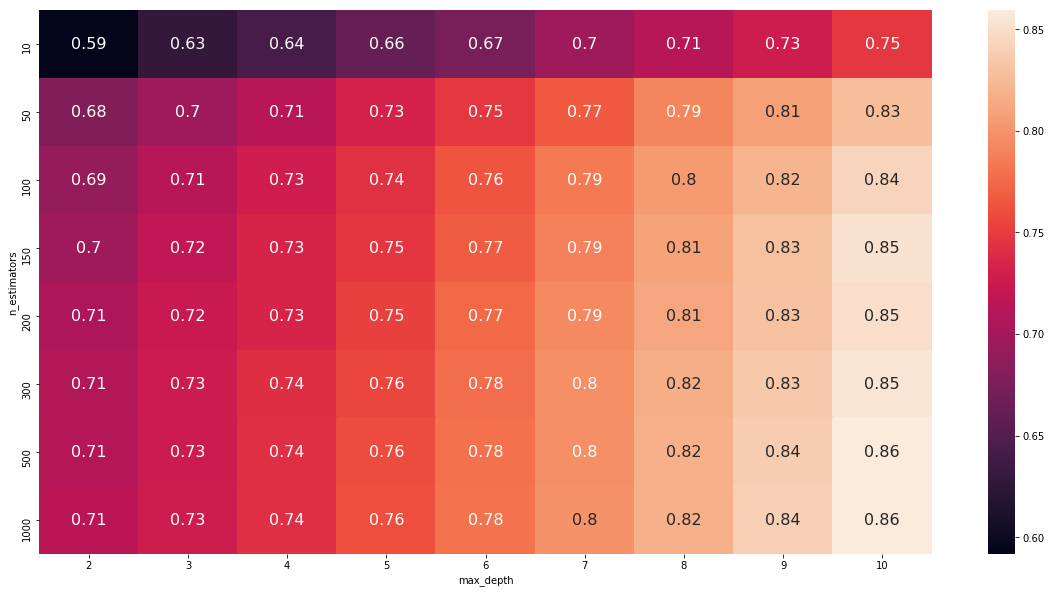

In [114]:
df_tr = pd.DataFrame({"n_estimators": x1, "max_depth": y1, "AUC": z1})

df_tr = df_tr.pivot("n_estimators", "max_depth", "AUC")

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_tr, annot=True, annot_kws={"size": 16})

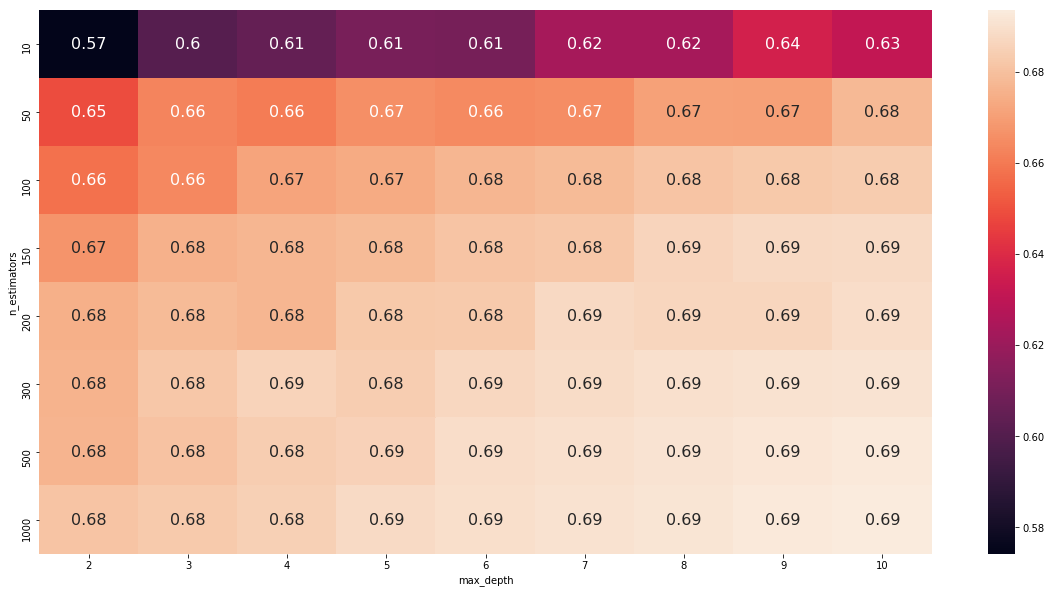

In [115]:
df_tr = pd.DataFrame({"n_estimators": x2, "max_depth": y2, "AUC": z2})

df_tr = df_tr.pivot("n_estimators", "max_depth", "AUC")

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_tr, annot=True, annot_kws={"size": 16})

### Plot ROC curve and print AUC values for train and test

In [116]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

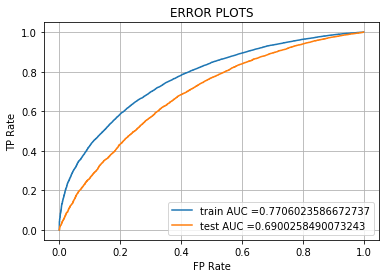

In [117]:
#https://stackoverflow.com/questions/55250963/how-to-get-probabilities-for-sgdclassifier-linearsvm

from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini', class_weight='balanced', max_depth=7, n_estimators=200)
model.fit(X_tr_bow, y_train)

y_train_pred = batch_predict(model, X_tr_bow)    
y_test_pred = batch_predict(model, X_te_bow)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Print confusion_matrix for train and test

Accuracy on test set: 66.98068962704676
Precision on test set: 0.9318768687143245
Recall on test set: 0.6590652408987144
F1-Score on test set: 0.7720804537841147


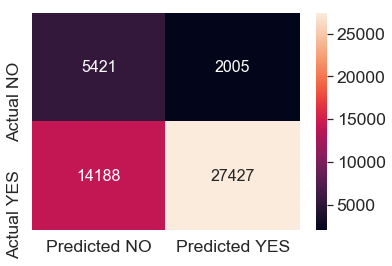

In [118]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced', max_depth=7, n_estimators=200)
neigh.fit(X_tr_bow, y_train)
y_Predicted = neigh.predict(X_tr_bow)
print("Accuracy on test set: {}".format(accuracy_score(y_train, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_train, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_train, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_train, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_train, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

### GBDT

In [130]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

neigh = XGBClassifier(max_depth=5)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500]}

clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_bow, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [131]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

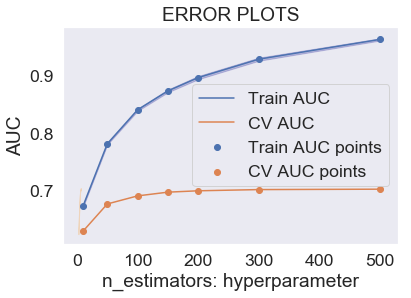

In [132]:
plt.plot(parameters['n_estimators'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_estimators'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_estimators'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['n_estimators']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_estimators'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_estimators'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Plot ROC curve and print AUC values for train and test

In [115]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

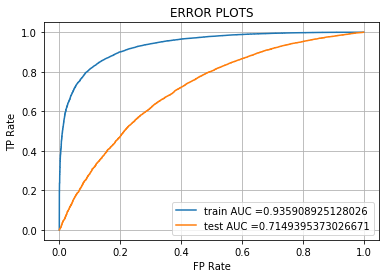

In [116]:
#https://stackoverflow.com/questions/55250963/how-to-get-probabilities-for-sgdclassifier-linearsvm

from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(max_depth=5, n_estimators=500)
model.fit(X_tr_bow, y_train)

y_train_pred = batch_predict(model, X_tr_bow)    
y_test_pred = batch_predict(model, X_te_bow)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Print confusion_matrix for train and test

Accuracy on test set: 84.98399298546114
Precision on test set: 0.8497069694308876
Recall on test set: 0.9999038808122072
F1-Score on test set: 0.918707084980019


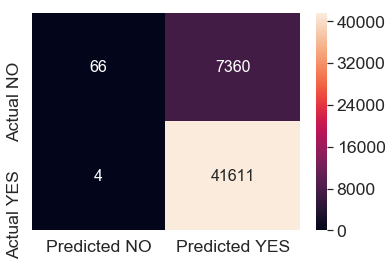

In [118]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

neigh = XGBClassifier(max_depth=5, n_estimators=500)
neigh.fit(X_tr_bow, y_train)
y_Predicted = neigh.predict(X_tr_bow)
print("Accuracy on test set: {}".format(accuracy_score(y_train, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_train, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_train, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_train, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_train, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

#### 1.5.2.2 TFIDF vectorizer

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = CountVectorizer(min_df=10,ngram_range=(2,2),max_features=5000)
vectorizer_tfidf_essay.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_essays_tfidf = vectorizer_tfidf_essay.transform(X_train['preprocessed_essays'].values)
X_cv_preprocessed_essays_tfidf = vectorizer_tfidf_essay.transform(X_cv['preprocessed_essays'].values)
X_test_preprocessed_essays_tfidf = vectorizer_tfidf_essay.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_preprocessed_essays_tfidf.shape, y_train.shape)
print(X_cv_preprocessed_essays_tfidf.shape, y_cv.shape)
print(X_test_preprocessed_essays_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_title= TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer_tfidf_title.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_project_title_tfidf = vectorizer_tfidf_title.transform(X_train['preprocessed_project_title'].values)
X_cv_preprocessed_project_title_tfidf = vectorizer_tfidf_title.transform(X_cv['preprocessed_project_title'].values)
X_test_preprocessed_project_title_tfidf = vectorizer_tfidf_title.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print(X_train_preprocessed_project_title_tfidf.shape, y_train.shape)
print(X_cv_preprocessed_project_title_tfidf.shape, y_cv.shape)
print(X_test_preprocessed_project_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 4105) (49041,)
(24155, 4105) (24155,)
(36052, 4105) (36052,)


### Concatinating all the features

In [129]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_preprocessed_essays_tfidf, X_train_preprocessed_project_title_tfidf, X_train_cat_class_1_norm, X_train_cat_class_0_norm, X_train_subcat_class_1_norm, X_train_subcat_class_0_norm, X_train_school_state_class_1_norm, X_train_school_state_class_0_norm, X_train_teacher_prefix_class_1_norm, X_train_teacher_prefix_class_0_norm, X_train_clean_grades_class_1_norm, X_train_clean_grades_class_0_norm, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_preprocessed_essays_tfidf, X_cv_preprocessed_project_title_tfidf, X_cv_cat_class_1_norm, X_cv_cat_class_0_norm, X_cv_subcat_class_1_norm, X_cv_subcat_class_0_norm, X_cv_school_state_class_1_norm, X_cv_school_state_class_0_norm, X_cv_teacher_prefix_class_1_norm, X_cv_teacher_prefix_class_0_norm, X_cv_clean_grades_class_1_norm, X_cv_clean_grades_class_0_norm, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_te_tfidf = hstack((X_test_preprocessed_essays_tfidf, X_test_preprocessed_project_title_tfidf, X_test_cat_class_1_norm, X_test_cat_class_0_norm, X_test_subcat_class_1_norm, X_test_subcat_class_0_norm, X_test_school_state_class_1_norm, X_test_school_state_class_0_norm, X_test_teacher_prefix_class_1_norm, X_test_teacher_prefix_class_0_norm, X_test_clean_grades_class_1_norm, X_test_clean_grades_class_0_norm, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 9117) (49041,)
(24155, 9117) (24155,)
(36052, 9117) (36052,)


### 2.4.2 Applying Ensemble Models on TFIDF,<font color='red'> SET 2</font>

## RF

### Find best 'n_estimators' and 'max_depth' using gridsearchCV

In [123]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced')
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500, 1000],'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_tfidf, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [124]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [125]:
z1 = train_auc
x1 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000]
y1 = [2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4, 5,5,5,5,5,5,5,5, 6,6,6,6,6,6,6,6, 7,7,7,7,7,7,7,7, 8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9, 10,10,10,10,10,10,10,10]

z2 = cv_auc
x2 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000]
y2 = [2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4, 5,5,5,5,5,5,5,5, 6,6,6,6,6,6,6,6, 7,7,7,7,7,7,7,7, 8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9, 10,10,10,10,10,10,10,10]

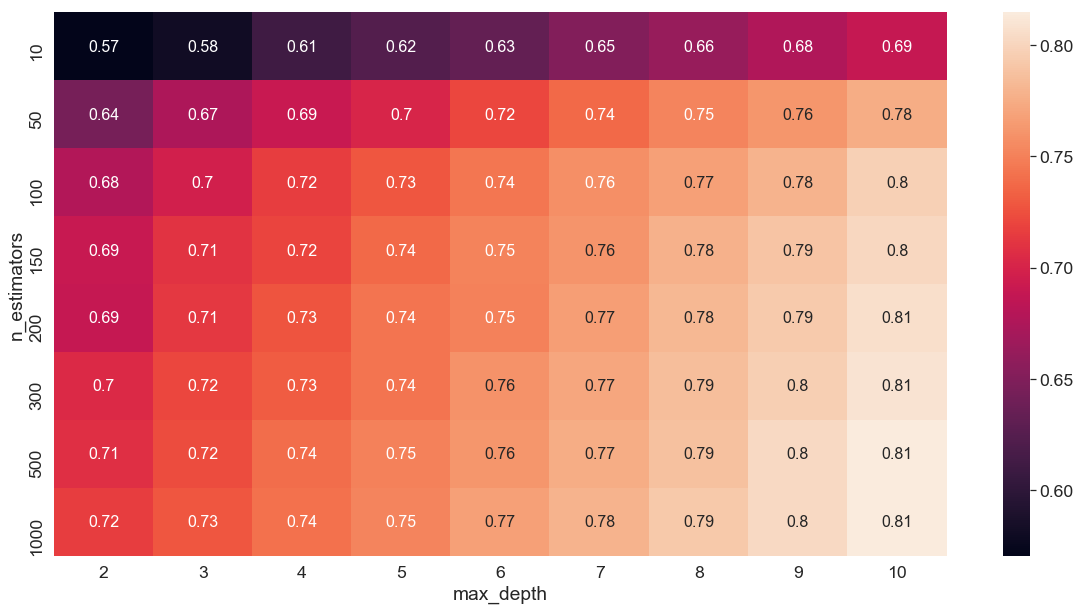

In [126]:
df_tr = pd.DataFrame({"n_estimators": x1, "max_depth": y1, "AUC": z1})

df_tr = df_tr.pivot("n_estimators", "max_depth", "AUC")

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_tr, annot=True, annot_kws={"size": 16})

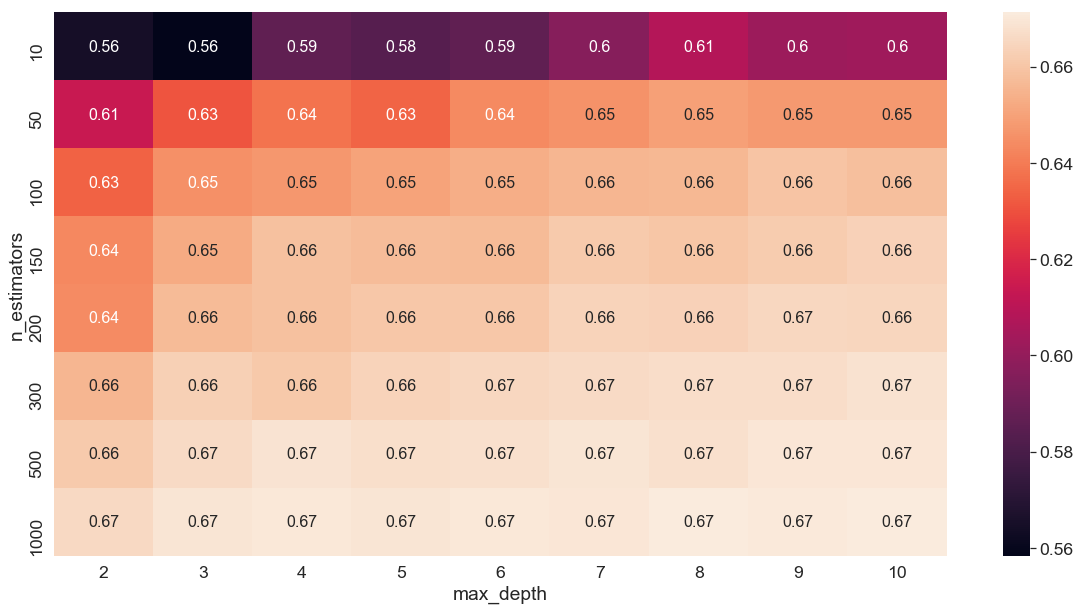

In [127]:
df_tr = pd.DataFrame({"n_estimators": x2, "max_depth": y2, "AUC": z2})

df_tr = df_tr.pivot("n_estimators", "max_depth", "AUC")

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_tr, annot=True, annot_kws={"size": 16})

### Plot ROC curve and print AUC values for train and test

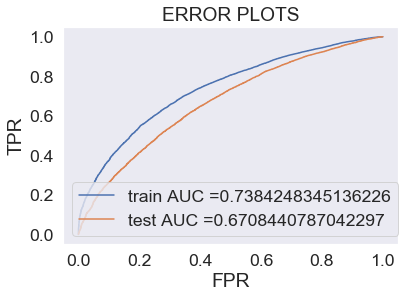

In [129]:
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

model = RandomForestClassifier(criterion='gini', class_weight='balanced', max_depth=6, n_estimators=500)
model.fit(X_tr_tfidf, y_train)

y_train_pred = batch_predict(model, X_tr_tfidf)    
y_test_pred = batch_predict(model, X_te_tfidf)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Print confusion_matrix for train and test

Accuracy on test set: 65.47990456964581
Precision on test set: 0.923459585563332
Recall on test set: 0.6468100444551244
F1-Score on test set: 0.7607648064666563


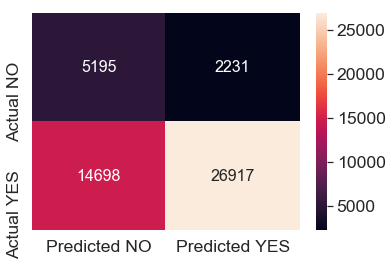

In [130]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced', max_depth=6, n_estimators=500)
neigh.fit(X_tr_tfidf, y_train)
y_Predicted = neigh.predict(X_tr_tfidf)
print("Accuracy on test set: {}".format(accuracy_score(y_train, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_train, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_train, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_train, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_train, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

### GBDT

In [130]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

neigh = XGBClassifier(max_depth=5)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500]}

clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_tfidf, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [133]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

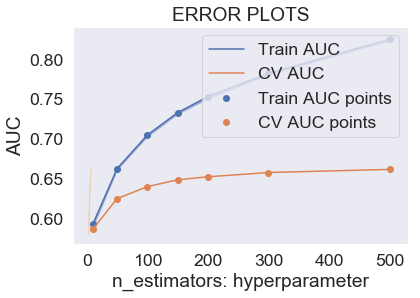

In [134]:
plt.plot(parameters['n_estimators'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_estimators'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_estimators'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['n_estimators']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_estimators'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_estimators'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Plot ROC curve and print AUC values for train and test

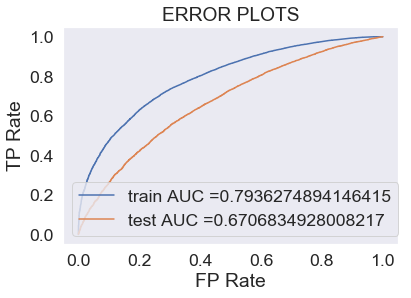

In [135]:
#https://stackoverflow.com/questions/55250963/how-to-get-probabilities-for-sgdclassifier-linearsvm

from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(max_depth=5, n_estimators=500)
model.fit(X_tr_tfidf, y_train)

y_train_pred = batch_predict(model, X_tr_tfidf)    
y_test_pred = batch_predict(model, X_te_tfidf)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Print confusion_matrix for train and test

Accuracy on test set: 84.96971921453478
Precision on test set: 0.8495569801151444
Recall on test set: 0.9999519404061036
F1-Score on test set: 0.9186396900559622


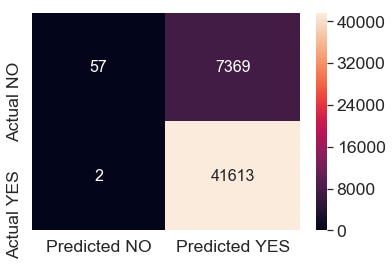

In [136]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

neigh = XGBClassifier(max_depth=5, n_estimators=500)
neigh.fit(X_tr_tfidf, y_train)
y_Predicted = neigh.predict(X_tr_tfidf)
print("Accuracy on test set: {}".format(accuracy_score(y_train, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_train, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_train, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_train, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_train, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

#### AVG W2V Vectorizer

In [118]:
import pickle

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [119]:
# average Word2Vec
# compute average word2vec for each review.
X_train_avg_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words=0 # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_train_avg_w2v_vectors_preprocessed_essays))
print(len(X_train_avg_w2v_vectors_preprocessed_essays[0]))

X_cv_avg_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avg_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_cv_avg_w2v_vectors_preprocessed_essays))
print(len(X_cv_avg_w2v_vectors_preprocessed_essays[0]))

X_test_avg_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_test_avg_w2v_vectors_preprocessed_essays))
print(len(X_test_avg_w2v_vectors_preprocessed_essays[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:31<00:00, 1534.21it/s]


49041
300


100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:17<00:00, 1348.92it/s]


24155
300


100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:30<00:00, 1181.06it/s]


36052
300


In [120]:
# average Word2Vec
# compute average word2vec for each review.
X_train_avg_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_train_avg_w2v_vectors_preprocessed_project_title))
print(len(X_train_avg_w2v_vectors_preprocessed_project_title[0]))

X_cv_avg_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avg_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_cv_avg_w2v_vectors_preprocessed_project_title))
print(len(X_cv_avg_w2v_vectors_preprocessed_project_title[0]))

X_test_avg_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_test_avg_w2v_vectors_preprocessed_project_title))
print(len(X_test_avg_w2v_vectors_preprocessed_project_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:02<00:00, 19850.88it/s]


49041
300


100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:01<00:00, 20764.59it/s]


24155
300


100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 21770.86it/s]


36052
300


### Concatenating all the features

In [121]:
from scipy import sparse
X_train_avg_w2v_essays = sparse.csr_matrix(X_train_avg_w2v_vectors_preprocessed_essays)
X_train_avg_w2v_project_title = sparse.csr_matrix(X_train_avg_w2v_vectors_preprocessed_project_title)


X_cv_avg_w2v_essays = sparse.csr_matrix(X_cv_avg_w2v_vectors_preprocessed_essays)
X_cv_avg_w2v_project_title = sparse.csr_matrix(X_cv_avg_w2v_vectors_preprocessed_project_title)


X_test_avg_w2v_essays = sparse.csr_matrix(X_test_avg_w2v_vectors_preprocessed_essays)
X_test_avg_w2v_project_title = sparse.csr_matrix(X_test_avg_w2v_vectors_preprocessed_project_title)

In [122]:
from scipy.sparse import hstack
X_tr_avg_w2v = hstack((X_train_avg_w2v_essays, X_train_avg_w2v_project_title,  X_train_cat_class_1_norm, X_train_cat_class_0_norm, X_train_subcat_class_1_norm, X_train_subcat_class_0_norm, X_train_school_state_class_1_norm, X_train_school_state_class_0_norm, X_train_school_state_class_1_norm, X_train_teacher_prefix_class_1_norm, X_train_teacher_prefix_class_0_norm, X_train_clean_grades_class_1_norm, X_train_clean_grades_class_0_norm, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cr_avg_w2v = hstack((X_cv_avg_w2v_essays, X_cv_avg_w2v_project_title,  X_cv_cat_class_1_norm, X_cv_cat_class_0_norm, X_cv_subcat_class_1_norm, X_cv_subcat_class_0_norm, X_cv_school_state_class_1_norm, X_cv_school_state_class_0_norm, X_cv_school_state_class_1_norm, X_cv_teacher_prefix_class_1_norm, X_cv_teacher_prefix_class_0_norm, X_cv_clean_grades_class_1_norm, X_cv_clean_grades_class_0_norm, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_te_avg_w2v = hstack((X_test_avg_w2v_essays, X_test_avg_w2v_project_title,  X_test_cat_class_1_norm, X_test_cat_class_0_norm, X_test_subcat_class_1_norm, X_test_subcat_class_0_norm, X_test_school_state_class_1_norm, X_test_school_state_class_0_norm, X_test_school_state_class_1_norm, X_test_teacher_prefix_class_1_norm, X_test_teacher_prefix_class_0_norm, X_test_clean_grades_class_1_norm, X_test_clean_grades_class_0_norm, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_avg_w2v.shape, y_train.shape)
print(X_cr_avg_w2v.shape, y_cv.shape)
print(X_te_avg_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 613) (49041,)
(24155, 613) (24155,)
(36052, 613) (36052,)


### 2.4.1 Applying Ensemble Models on AVG W2V,<font color='red'> SET 3</font>

## RF

### Find best 'max_depth' and 'n_estimators' using gridsearchCV

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced')
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300],'max_depth':[5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_avg_w2v, y_train)

In [108]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [124]:
z1 = train_auc
x1 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000]
y1 = [2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4, 5,5,5,5,5,5,5,5, 6,6,6,6,6,6,6,6, 7,7,7,7,7,7,7,7, 8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9, 10,10,10,10,10,10,10,10]

z2 = cv_auc
x2 = [10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000,10, 50, 100, 150, 200, 300, 500, 1000]
y2 = [2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4, 5,5,5,5,5,5,5,5, 6,6,6,6,6,6,6,6, 7,7,7,7,7,7,7,7, 8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9, 10,10,10,10,10,10,10,10]

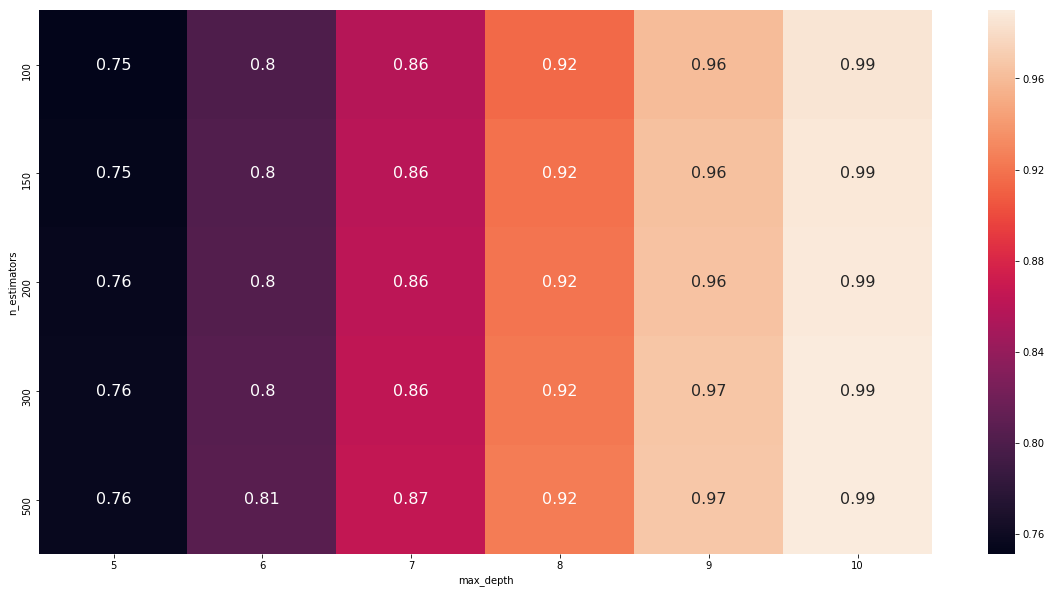

In [125]:
df_tr = pd.DataFrame({"n_estimators": x1, "max_depth": y1, "AUC": z1})

df_tr = df_tr.pivot("n_estimators", "max_depth", "AUC")

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_tr, annot=True, annot_kws={"size": 16})

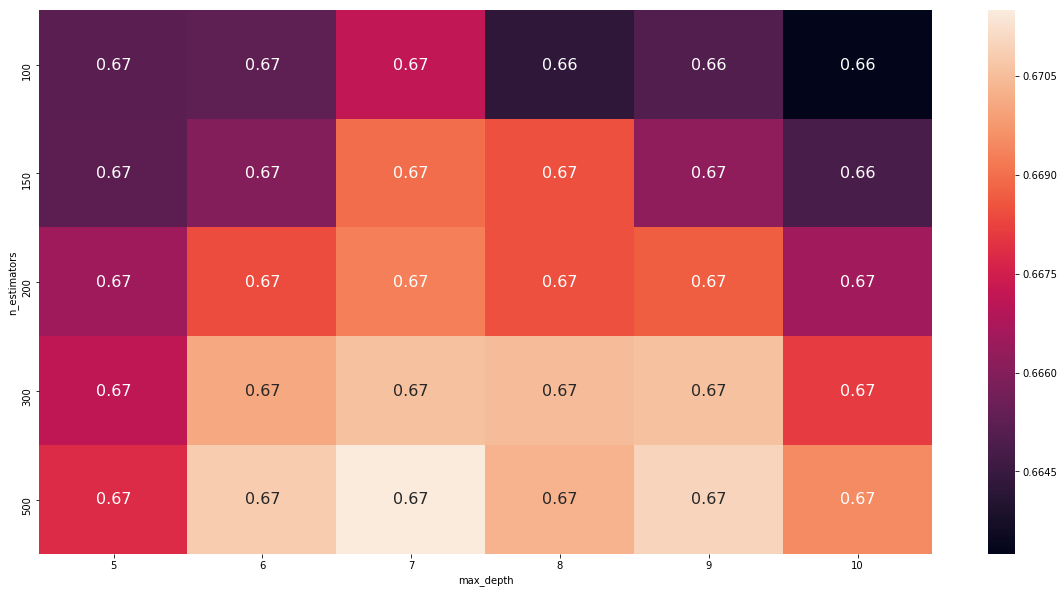

In [126]:
df_tr = pd.DataFrame({"n_estimators": x2, "max_depth": y2, "AUC": z2})

df_tr = df_tr.pivot("n_estimators", "max_depth", "AUC")

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_tr, annot=True, annot_kws={"size": 16})

### Plot ROC curve and print AUC values for train and test

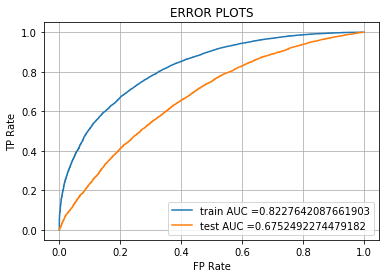

In [123]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced', max_depth=7, n_estimators=200)
neigh.fit(X_tr_avg_w2v, y_train)

y_train_pred = batch_predict(neigh, X_tr_avg_w2v)    
y_test_pred = batch_predict(neigh, X_te_avg_w2v)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Print confusion_matrix for train and test

Accuracy on test set: 78.0510185355111
Precision on test set: 0.9322442345952308
Recall on test set: 0.799447314670191
F1-Score on test set: 0.8607539261597372


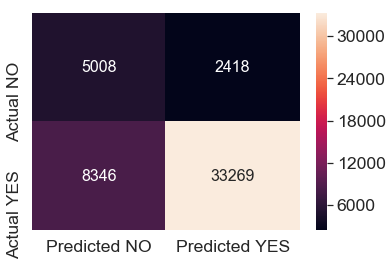

In [124]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced', max_depth=7, n_estimators=200)
neigh.fit(X_tr_avg_w2v, y_train)
y_Predicted = neigh.predict(X_tr_avg_w2v)
print("Accuracy on test set: {}".format(accuracy_score(y_train, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_train, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_train, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_train, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_train, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

## GBDT

### Find best 'max_depth' and 'n_estimators' using gridsearchCV

In [136]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

neigh = XGBClassifier(max_depth=5)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300]}

clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_avg_w2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [138]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

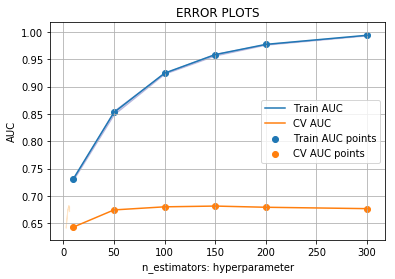

In [139]:
plt.plot(parameters['n_estimators'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_estimators'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_estimators'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['n_estimators']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_estimators'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_estimators'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Plot ROC curve and print AUC values for train and test

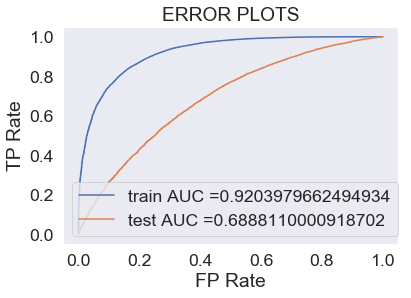

In [125]:
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

neigh = XGBClassifier(max_depth=5, n_estimators=150)
neigh.fit(X_tr_avg_w2v, y_train)

y_train_pred = batch_predict(neigh, X_tr_avg_w2v)    
y_test_pred = batch_predict(neigh, X_te_avg_w2v)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Print confusion_matrix for train and test

Accuracy on test set: 87.19438836891581
Precision on test set: 0.8691264651191943
Recall on test set: 0.9996155232488285
F1-Score on test set: 0.9298151500927602


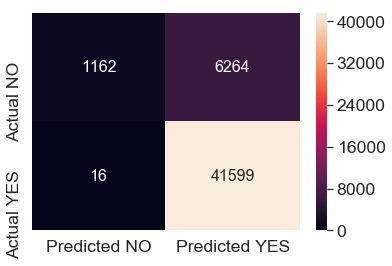

In [127]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

neigh = XGBClassifier(max_depth=5, n_estimators=150)
neigh.fit(X_tr_avg_w2v, y_train)
y_Predicted = neigh.predict(X_tr_avg_w2v)
print("Accuracy on test set: {}".format(accuracy_score(y_train, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_train, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_train, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_train, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_train, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

#### TFIDF W2V Vectorizer

In [102]:
import pickle

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [103]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [104]:
# average Word2Vec
# compute average word2vec for each review.
X_train_tfidf_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_train_tfidf_w2v_vectors_preprocessed_essays))
print(len(X_train_tfidf_w2v_vectors_preprocessed_essays[0]))


# average Word2Vec
# compute average word2vec for each review.
X_cv_tfidf_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_cv_tfidf_w2v_vectors_preprocessed_essays))
print(len(X_cv_tfidf_w2v_vectors_preprocessed_essays[0]))


# average Word2Vec
# compute average word2vec for each review.
X_test_tfidf_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_test_tfidf_w2v_vectors_preprocessed_essays))
print(len(X_test_tfidf_w2v_vectors_preprocessed_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [05:22<00:00, 151.96it/s]


49041
300


100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [02:58<00:00, 135.06it/s]


24155
300


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [05:00<00:00, 120.16it/s]


36052
300


In [105]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [106]:
# average Word2Vec
# compute average word2vec for each review.
X_train_tfidf_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_train_tfidf_w2v_vectors_preprocessed_project_title))
print(len(X_train_tfidf_w2v_vectors_preprocessed_project_title[0]))


# average Word2Vec
# compute average word2vec for each review.
X_cv_tfidf_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_cv_tfidf_w2v_vectors_preprocessed_project_title))
print(len(X_cv_tfidf_w2v_vectors_preprocessed_project_title[0]))


# average Word2Vec
# compute average word2vec for each review.
X_test_tfidf_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_test_tfidf_w2v_vectors_preprocessed_project_title))
print(len(X_test_tfidf_w2v_vectors_preprocessed_project_title[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:13<00:00, 3727.13it/s]


49041
300


100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:05<00:00, 4519.44it/s]


24155
300


100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:07<00:00, 4823.41it/s]


36052
300


In [107]:
from scipy import sparse
X_train_tfidf_w2v_essays = sparse.csr_matrix(X_train_tfidf_w2v_vectors_preprocessed_essays)
X_train_tfidf_w2v_project_title = sparse.csr_matrix(X_train_tfidf_w2v_vectors_preprocessed_project_title)


X_cv_tfidf_w2v_essays = sparse.csr_matrix(X_cv_tfidf_w2v_vectors_preprocessed_essays)
X_cv_tfidf_w2v_project_title = sparse.csr_matrix(X_cv_tfidf_w2v_vectors_preprocessed_project_title)


X_test_tfidf_w2v_essays = sparse.csr_matrix(X_test_tfidf_w2v_vectors_preprocessed_essays)
X_test_tfidf_w2v_project_title = sparse.csr_matrix(X_test_tfidf_w2v_vectors_preprocessed_project_title)

### Concatenating all the features

In [108]:
from scipy.sparse import hstack
X_tr_tfidf_w2v = hstack((X_train_tfidf_w2v_essays, X_train_tfidf_w2v_project_title, X_train_cat_class_1_norm, X_train_cat_class_0_norm, X_train_subcat_class_1_norm, X_train_subcat_class_0_norm, X_train_school_state_class_1_norm, X_train_school_state_class_0_norm, X_train_school_state_class_1_norm, X_train_teacher_prefix_class_1_norm, X_train_teacher_prefix_class_0_norm, X_train_clean_grades_class_1_norm, X_train_clean_grades_class_0_norm, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cr_tfidf_w2v = hstack((X_cv_tfidf_w2v_essays, X_cv_tfidf_w2v_project_title, X_cv_cat_class_1_norm, X_cv_cat_class_0_norm, X_cv_subcat_class_1_norm, X_cv_subcat_class_0_norm, X_cv_school_state_class_1_norm, X_cv_school_state_class_0_norm, X_cv_school_state_class_1_norm, X_cv_teacher_prefix_class_1_norm, X_cv_teacher_prefix_class_0_norm, X_cv_clean_grades_class_1_norm, X_cv_clean_grades_class_0_norm, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_te_tfidf_w2v = hstack((X_test_tfidf_w2v_essays, X_test_tfidf_w2v_project_title, X_test_cat_class_1_norm, X_test_cat_class_0_norm, X_test_subcat_class_1_norm, X_test_subcat_class_0_norm, X_test_school_state_class_1_norm, X_test_school_state_class_0_norm, X_test_school_state_class_1_norm, X_test_teacher_prefix_class_1_norm, X_test_teacher_prefix_class_0_norm, X_test_clean_grades_class_1_norm, X_test_clean_grades_class_0_norm, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_cr_tfidf_w2v.shape, y_cv.shape)
print(X_te_tfidf_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 613) (49041,)
(24155, 613) (24155,)
(36052, 613) (36052,)


### 2.4.1 Applying Ensemble Models on TFIDF W2V,<font color='red'> SET 4</font>

## RF

### Find best 'max_depth' and 'n_estimators' using gridsearchCV

In [109]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced')
parameters = {'n_estimators':[10, 50, 100, 150, 200],'max_depth':[2, 3, 4, 5, 6, 7]}

clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_tfidf_w2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [110]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [111]:
z1 = train_auc
x1 = [10, 50, 100, 150, 200, 10, 50, 100, 150, 200, 10, 50, 100, 150, 200, 10, 50, 100, 150, 200, 10, 50, 100, 150, 200, 10, 50, 100, 150, 200]
y1 = [2,2,2,2,2, 3,3,3,3,3, 4,4,4,4,4, 5,5,5,5,5, 6,6,6,6,6, 7,7,7,7,7]

z2 = cv_auc
x2 = [10, 50, 100, 150, 200, 10, 50, 100, 150, 200, 10, 50, 100, 150, 200, 10, 50, 100, 150, 200, 10, 50, 100, 150, 200, 10, 50, 100, 150, 200]
y2 = [2,2,2,2,2, 3,3,3,3,3, 4,4,4,4,4, 5,5,5,5,5, 6,6,6,6,6, 7,7,7,7,7]

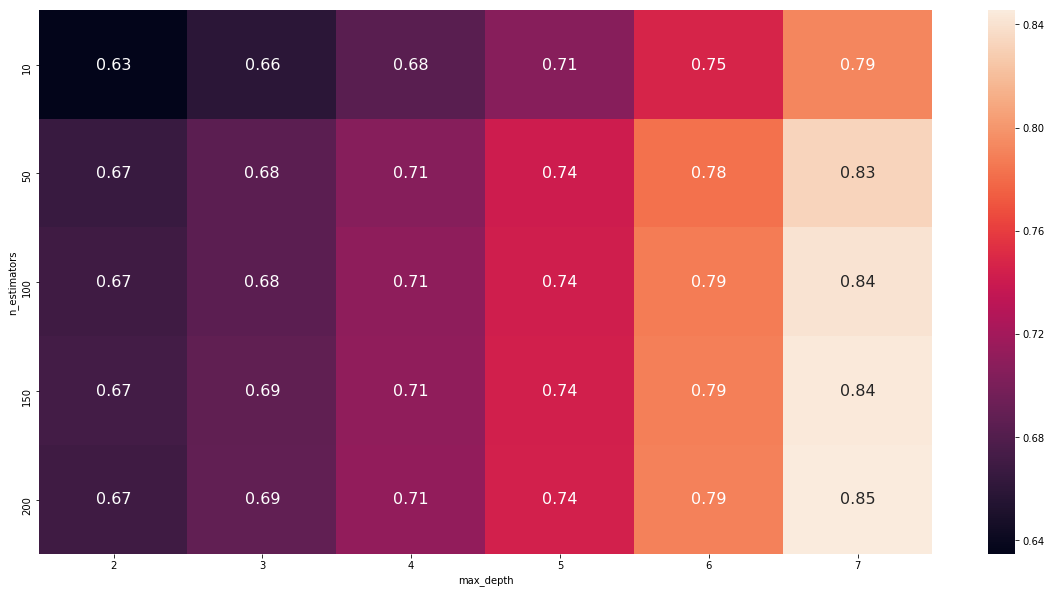

In [112]:
df_tr = pd.DataFrame({"n_estimators": x1, "max_depth": y1, "AUC": z1})

df_tr = df_tr.pivot("n_estimators", "max_depth", "AUC")

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_tr, annot=True, annot_kws={"size": 16})

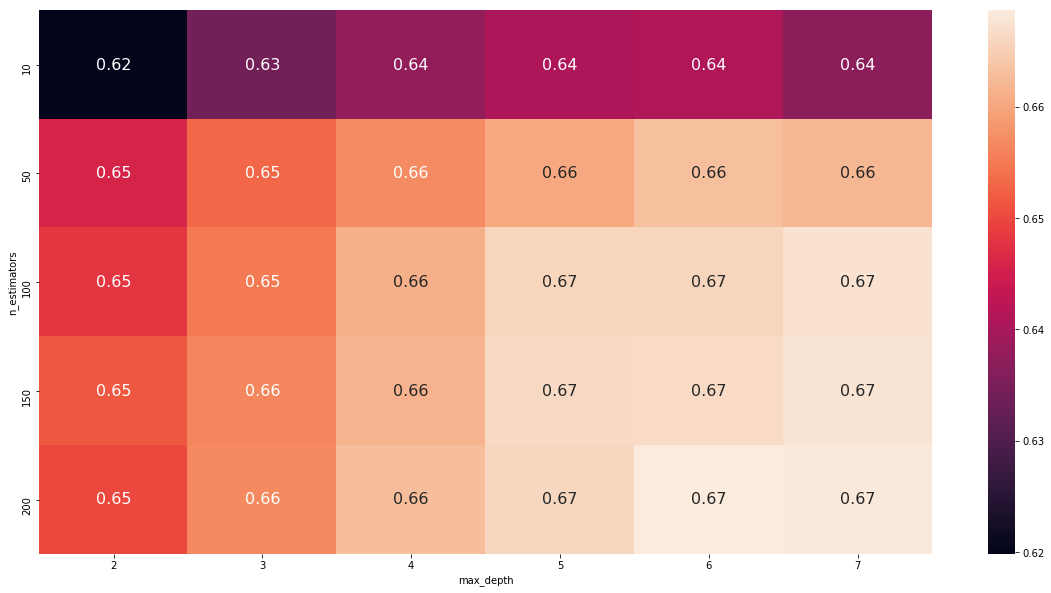

In [113]:
df_tr = pd.DataFrame({"n_estimators": x2, "max_depth": y2, "AUC": z2})

df_tr = df_tr.pivot("n_estimators", "max_depth", "AUC")

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_tr, annot=True, annot_kws={"size": 16})

### Plot ROC curve and print AUC values for train and test

In [114]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

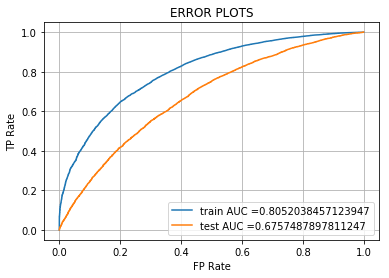

In [116]:
from sklearn.metrics import roc_curve, auc

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced', max_depth=7, n_estimators=200)
neigh.fit(X_tr_tfidf_w2v, y_train)

y_train_pred = batch_predict(neigh, X_tr_tfidf_w2v)    
y_test_pred = batch_predict(neigh, X_te_tfidf_w2v)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Print confusion_matrix for train and test

Accuracy on test set: 73.53438959238188
Precision on test set: 0.9344844328457851
Recall on test set: 0.7399975970203052
F1-Score on test set: 0.8259464388686989


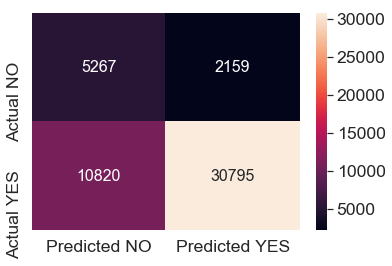

In [117]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

neigh = RandomForestClassifier(criterion='gini', class_weight='balanced', max_depth=7, n_estimators=200)
neigh.fit(X_tr_tfidf_w2v, y_train)
y_Predicted = neigh.predict(X_tr_tfidf_w2v)
print("Accuracy on test set: {}".format(accuracy_score(y_train, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_train, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_train, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_train, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_train, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

## GBDT

### Find best 'max_depth' and 'n_estimators' using gridsearchCV

In [118]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

neigh = XGBClassifier(max_depth=5)
parameters = {'n_estimators':[10, 50, 100, 150, 200, 300, 500]}

clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr_tfidf_w2v, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [119]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

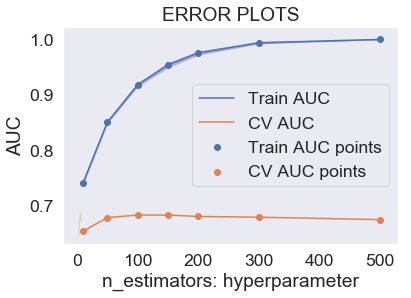

In [120]:
plt.plot(parameters['n_estimators'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_estimators'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_estimators'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['n_estimators']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_estimators'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_estimators'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Plot ROC curve and print AUC values for train and test

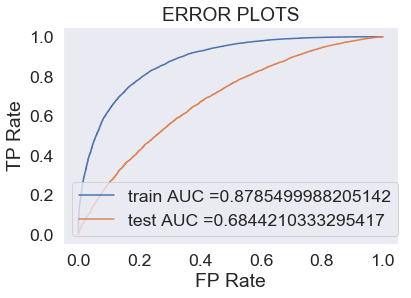

In [123]:
from sklearn.metrics import roc_curve, auc

neigh = XGBClassifier(max_depth=5, n_estimators=100)
neigh.fit(X_tr_tfidf_w2v, y_train)

y_train_pred = batch_predict(neigh, X_tr_tfidf_w2v)    
y_test_pred = batch_predict(neigh, X_te_tfidf_w2v)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Print confusion_matrix for train and test

Accuracy on test set: 85.9362574172631
Precision on test set: 0.8580061046032008
Recall on test set: 0.9997116424366214
F1-Score on test set: 0.9234542690032519


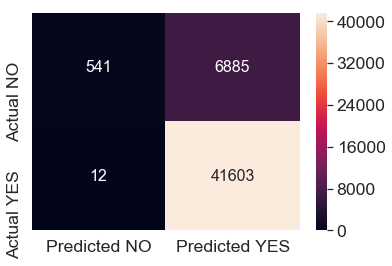

In [124]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

neigh = XGBClassifier(max_depth=5, n_estimators=100)
neigh.fit(X_tr_tfidf_w2v, y_train)
y_Predicted = neigh.predict(X_tr_tfidf_w2v)
print("Accuracy on test set: {}".format(accuracy_score(y_train, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_train, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_train, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_train, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_train, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusions</h1>

In [134]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "max_depth", "n_estimators", "AUC"]

x.add_row(["BOW", "RF", 7, 200, 0.69])
x.add_row(["BOW", "GBDT", 5, 500, 0.71])
x.add_row(["TFIDF", "RF", 6, 500, 0.67])
x.add_row(["TFIDF", "GBDT", 5, 500, 0.67])
x.add_row(["AVG W2V", "RF", 7, 200, 0.67])
x.add_row(["AVG W2V", "GBDT", 5, 150, 0.68])
x.add_row(["TFIDF W2V", "RF", 7, 200, 0.67])
x.add_row(["TFIDF W2V", "GBDT", 5, 100, 0.68])

In [135]:
print(x)

+------------+-------+-----------+--------------+------+
| Vectorizer | Model | max_depth | n_estimators | AUC  |
+------------+-------+-----------+--------------+------+
|    BOW     |   RF  |     7     |     200      | 0.69 |
|    BOW     |  GBDT |     5     |     500      | 0.71 |
|   TFIDF    |   RF  |     6     |     500      | 0.67 |
|   TFIDF    |  GBDT |     5     |     500      | 0.67 |
|  AVG W2V   |   RF  |     7     |     200      | 0.67 |
|  AVG W2V   |  GBDT |     5     |     150      | 0.68 |
| TFIDF W2V  |   RF  |     7     |     200      | 0.67 |
| TFIDF W2V  |  GBDT |     5     |     100      | 0.68 |
+------------+-------+-----------+--------------+------+
